In [5]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

jtplot.style(theme='grade3')

In [6]:
#User-supplied
obsfile = '/glade/p/work/manab/fcast/data/dly/obsflow.dly.HHDW1.csv'
summaoutfile = '/glade/p/work/manab/fcast/PNW/output/7468_2650057/final.nc'
routefile = '/glade/p/work/manab/SHARP/PNW_route/output/paramtest21.nc'

hid = 17007511  #HRU ID to be plotted
sid = 17003601  #Reach ID to be plotted
pltwidth = 15
pltheight = 5
starttime1 = '2010-10-01'
endtime1 = '2016-09-01'

In [7]:
# Observed streamflow
o = pd.read_csv(obsfile)
o.rename(columns = {'Year':'time', 'cfs': 'flow'}, inplace=True)

o['flow'] = o['flow']*0.028316847 #Convert to CMS
o['time'] = pd.to_datetime(o['time'])  #convert to datetime format
o.loc[o['flow'] < 0 , 'flow'] = np.nan
o.fillna(method='ffill', limit=10)

o = o.set_index(['time'])
obs = o.to_xarray()

In [8]:
#Unit conversion
out = xr.open_dataset(summaoutfile).set_index(hru = 'hruId')
out

<xarray.Dataset>
Dimensions:                 (hru: 1, midToto: 8, time: 19248)
Coordinates:
  * time                    (time) datetime64[ns] 2010-06-01 ...
  * hru                     (hru) int64 17007511
Dimensions without coordinates: midToto
Data variables:
    mLayerTemp              (time, midToto, hru) float64 ...
    mLayerVolFracLiq        (time, midToto, hru) float64 ...
    pptrate                 (time, hru) float64 ...
    nSnow                   (time, hru) int32 ...
    nSoil                   (time, hru) int32 ...
    nLayers                 (time, hru) int32 ...
    scalarSWE               (time, hru) float64 ...
    scalarAquiferStorage    (time, hru) float64 ...
    scalarTotalSoilWat      (time, hru) float64 ...
    scalarRainPlusMelt      (time, hru) float64 ...
    scalarAquiferRecharge   (time, hru) float64 ...
    scalarAquiferTranspire  (time, hru) float64 ...
    scalarAquiferBaseflow   (time, hru) float64 ...
    averageInstantRunoff    (time, hru) float64 ..

In [9]:
out['pptrate'] = out['pptrate']*3600      #kg m-2 s-1 -> mm/hr
out['averageInstantRunoff'] = out['averageInstantRunoff']*3600000  #m/s to mm/h
out['scalarAquiferBaseflow'] = out['scalarAquiferBaseflow']*3600000  #m/s to mm/h
out['scalarRainPlusMelt'] = out['scalarRainPlusMelt']*3600000  #m/s to mm/h
out['scalarAquiferRecharge'] = out['scalarAquiferRecharge']*3600000  #m/s to mm/h
out['scalarAquiferStorage'] = out['scalarAquiferStorage']*1000  #m to mm
out['scalarAquiferTranspire'] = out['scalarAquiferTranspire']*3600000  #m/s to mm/h

# Summary Statistics (20101001 - 20160901)

In [10]:
param = {}
param['aquiferScaleFactor (Smax)'] = '3'
param['aquiferBaseflowRate(K)'] = '0.1'
param['aquiferBaseflowExp(c)'] = '1.5'

statsum = {}
statsum['pptrate (mm/h)'] = out['pptrate'].loc[starttime1:endtime1].sum().values
statsum['averageInstantRunoff (mm/h)'] = out['averageInstantRunoff'].loc[starttime1:endtime1].sum().values
statsum['scalarRainPlusMelt (mm/h)'] = out['scalarRainPlusMelt'].loc[starttime1:endtime1].sum().values
statsum['scalarAquiferRecharge (mm/h)'] = out['scalarAquiferRecharge'].loc[starttime1:endtime1].sum().values
statsum['scalarAquiferBaseflow (mm/h)'] = out['scalarAquiferBaseflow'].loc[starttime1:endtime1].sum().values
statsum['scalarAquiferStorage (mm)'] = out['scalarAquiferStorage'].loc[starttime1:endtime1].sum().values
statsum['scalarAquiferTranspire (mm/h)'] = out['scalarAquiferTranspire'].loc[starttime1:endtime1].sum().values

statavg = {}
statavg['pptrate (mm/h)'] = out['pptrate'].loc[starttime1:endtime1].mean().values
statavg['averageInstantRunoff (mm/h)'] = out['averageInstantRunoff'].loc[starttime1:endtime1].mean().values
statavg['scalarRainPlusMelt (mm/h)'] = out['scalarRainPlusMelt'].loc[starttime1:endtime1].mean().values
statavg['scalarAquiferRecharge (mm/h)'] = out['scalarAquiferRecharge'].loc[starttime1:endtime1].mean().values
statavg['scalarAquiferBaseflow (mm/h)'] = out['scalarAquiferBaseflow'].loc[starttime1:endtime1].mean().values
statavg['scalarAquiferStorage (mm)'] = out['scalarAquiferStorage'].loc[starttime1:endtime1].mean().values
statavg['scalarAquiferTranspire (mm/h)'] = out['scalarAquiferTranspire'].loc[starttime1:endtime1].mean().values

#totalbaseflow = statsum['scalarAquiferBaseflow (mm/h)'] 
#totalstreamflow = out.sel(hru = hid)['scalarAquiferRecharge'].loc[starttime1:endtime1].sum().values

#bfi = totalbaseflow / totalstreamflow
#print(bfi)

print('\n BASEFLOW PARAMETERS')
for x in param:
    print (x,':',param[x])
    
    
print('\n SUM')
for x in statsum:
    print (x,':',statsum[x])
    
print('\n AVERAGE')
for x in statavg:
    print (x,':',statavg[x])


 BASEFLOW PARAMETERS
aquiferScaleFactor (Smax) : 3
aquiferBaseflowRate(K) : 0.1
aquiferBaseflowExp(c) : 1.5

 SUM
pptrate (mm/h) : 4094.2294403329893
averageInstantRunoff (mm/h) : 3035.714581706615
scalarRainPlusMelt (mm/h) : 2567.526316312086
scalarAquiferRecharge (mm/h) : 0.0
scalarAquiferBaseflow (mm/h) : 0.0
scalarAquiferStorage (mm) : 0.0
scalarAquiferTranspire (mm/h) : 0.0

 AVERAGE
pptrate (mm/h) : 0.23660595471180013
averageInstantRunoff (mm/h) : 0.17543426847587926
scalarRainPlusMelt (mm/h) : 0.1483776188344941
scalarAquiferRecharge (mm/h) : 0.0
scalarAquiferBaseflow (mm/h) : 0.0
scalarAquiferStorage (mm) : 0.0
scalarAquiferTranspire (mm/h) : 0.0


# PLOTS

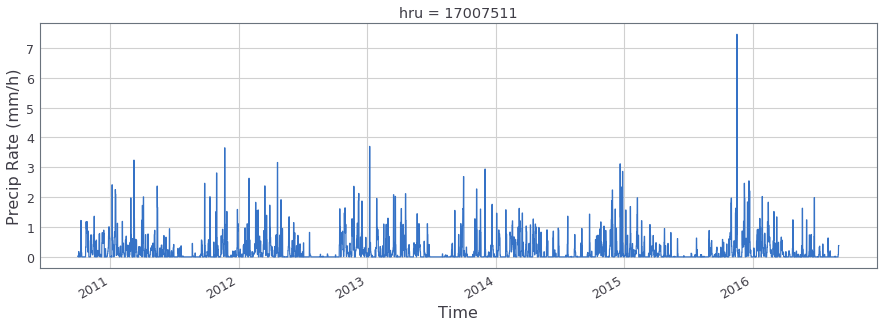

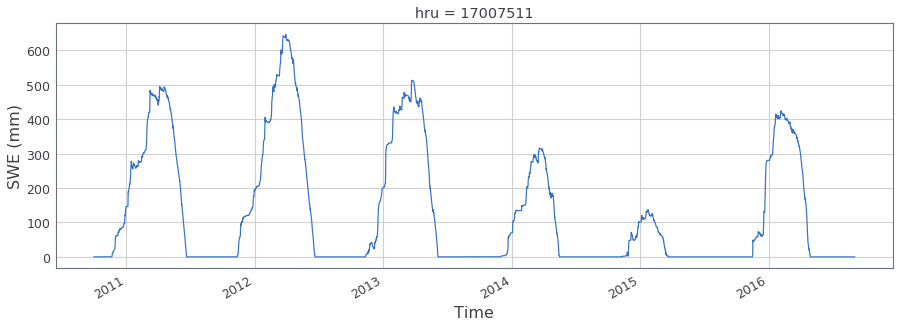

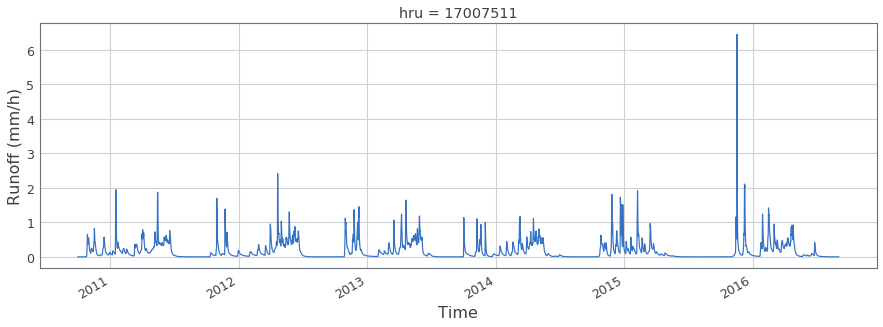

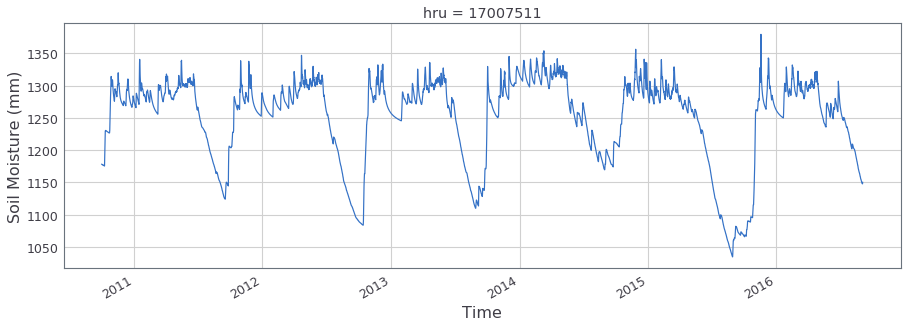

In [11]:
#Plot forcing and diagnostic variables


# PPTRATE
plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru = hid)['pptrate'].loc[starttime1:endtime1].plot()
plt.ylabel('Precip Rate (mm/h)', fontsize=16)
plt.xlabel('Time', fontsize=16)
#plt.savefig('figures/pptrate.png', bbox_inches='tight', dpi=300)
plt.show()

# SWE
plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru = hid)['scalarSWE'].loc[starttime1:endtime1].plot()
plt.ylabel('SWE (mm)', fontsize=16)
plt.xlabel('Time', fontsize=16)
#plt.savefig('figures/swe.png', bbox_inches='tight', dpi=300)
plt.show()

#averageInstantRunoff
plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru = hid)['averageInstantRunoff'].loc[starttime1:endtime1].plot()
plt.ylabel('Runoff (mm/h)', fontsize=16)
plt.xlabel('Time', fontsize=16)
#plt.savefig('figures/runoff.png', bbox_inches='tight', dpi=300)
plt.show()

#scalarTotalSoilWat
plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru = hid)['scalarTotalSoilWat'].loc[starttime1:endtime1].plot()
plt.ylabel('Soil Moisture (mm)', fontsize=16)
plt.xlabel('Time', fontsize=16)
#plt.savefig('figures/sm.png', bbox_inches='tight', dpi=300)
plt.show()



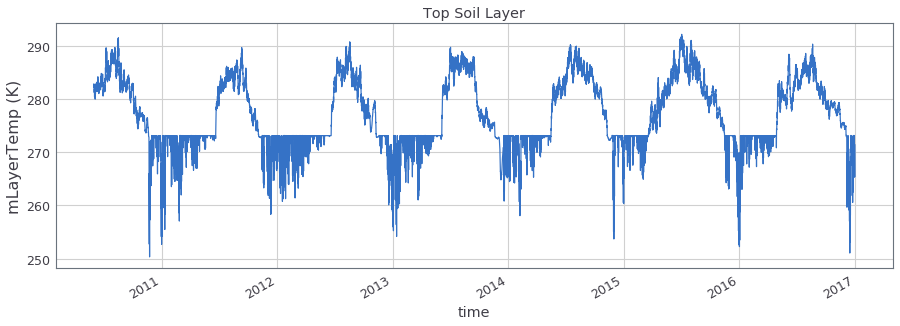

In [12]:
#mLayerTemp
plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru=hid)['mLayerTemp'][:, 0].plot(label = 'Top')
plt.ylabel('mLayerTemp (K)', fontsize = 16)
plt.title('Top Soil Layer')
plt.show()

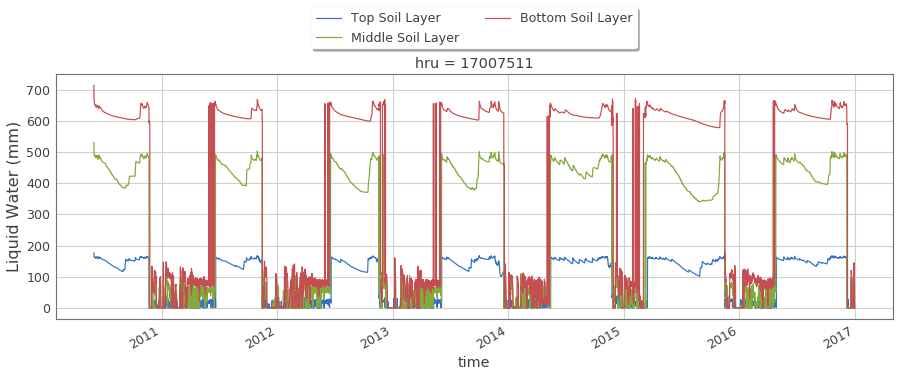

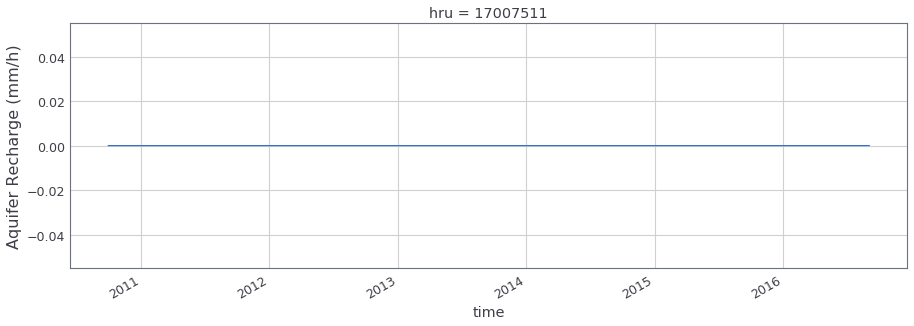

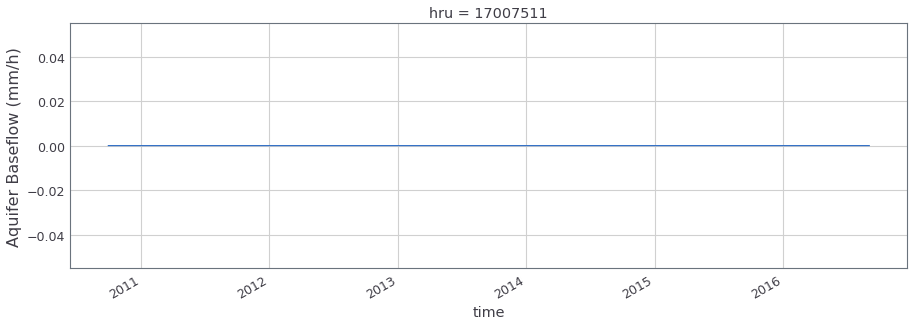

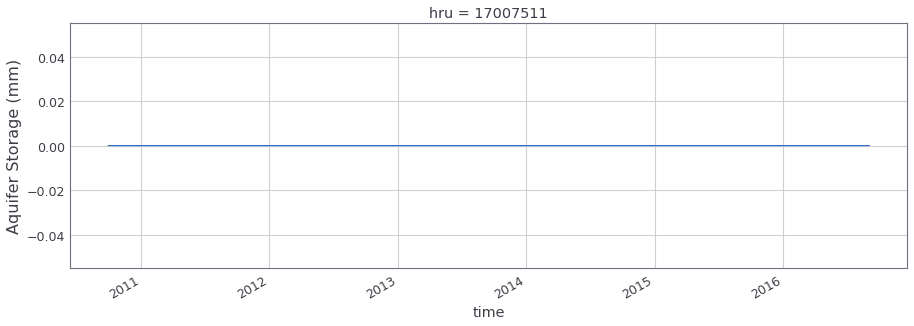

In [13]:
#mLayerVolFracLiq
iden_water = 1000
plt.figure(figsize=(pltwidth, pltheight))
(out.sel(hru = hid)['mLayerVolFracLiq'][:, 0]*iden_water*0.5).plot(label='Top Soil Layer')
(out.sel(hru = hid)['mLayerVolFracLiq'][:, 1]*iden_water*1.5).plot(label='Middle Soil Layer')
(out.sel(hru = hid)['mLayerVolFracLiq'][:, 2]*iden_water*2.0).plot(label='Bottom Soil Layer')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2, fancybox=True, shadow=True)
plt.ylabel('Liquid Water (mm)', fontsize=16) 
plt.show()


plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru = hid)['scalarAquiferRecharge'].loc[starttime1:endtime1].plot()
plt.ylabel('Aquifer Recharge (mm/h)', fontsize=16)
plt.show()


plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru = hid)['scalarAquiferBaseflow'].loc[starttime1:endtime1].plot()
plt.ylabel('Aquifer Baseflow (mm/h)', fontsize=16)
plt.show()

plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru = hid)['scalarAquiferStorage'].loc[starttime1:endtime1].plot()
plt.ylabel('Aquifer Storage (mm)', fontsize=16)
plt.show()